In [1]:
import pandas as pd
import numpy as np

original_data = pd.read_csv("pokemon.csv")
original_data.head(10)
# original_data["Type 1"].unique() - typy Pokemonów
# original_data = original_data[original_data['Generation'] == 1] #ograniczenie do generacji 1

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
5       80       65     80           1      False  
6      109       85    100           1      False  
7      130       85    100           1      False  
8      159      115    100           1      False  
9       50       64     43           1      False

In [2]:
# Czyszczenie danych - pozostawienie tylko kolumn liczbowych, które wykorzystamy w analizie PCA
# (informacja o typie, generacji czy legendarności nam się nie przyda)

data = original_data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
data

HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0    45      49       49       65       65     45
1    60      62       63       80       80     60
2    80      82       83      100      100     80
3    80     100      123      122      120     80
4    39      52       43       60       50     65
..   ..     ...      ...      ...      ...    ...
795  50     100      150      100      150     50
796  50     160      110      160      110    110
797  80     110       60      150      130     70
798  80     160       60      170      130     80
799  80     110      120      130       90     70

[800 rows x 6 columns]

In [3]:
# Standaryzacja danych
mean = data.mean()
std = data.std()
data = (data - mean) / std

data

HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
0   -0.950032 -0.924328 -0.796655 -0.238981 -0.248033 -0.801002
1   -0.362595 -0.523803 -0.347700  0.219422  0.290974 -0.284837
2    0.420654  0.092390  0.293665  0.830626  1.009651  0.403383
3    0.420654  0.646964  1.576395  1.502951  1.728328  0.403383
4   -1.185007 -0.831899 -0.989065 -0.391782 -0.787041 -0.112782
..        ...       ...       ...       ...       ...       ...
795 -0.754220  0.646964  2.442237  0.830626  2.806344 -0.628947
796 -0.754220  2.495543  1.159507  2.664239  1.368990  1.435713
797  0.420654  0.955061 -0.443905  2.358637  2.087667  0.059273
798  0.420654  2.495543 -0.443905  2.969841  2.087667  0.403383
799  0.420654  0.955061  1.480190  1.747432  0.650313  0.059273

[800 rows x 6 columns]

In [4]:
# Macierz kowariancji
cov_matrix = np.cov(data, rowvar = False) # nasze wartości są w kolumnach, więc trzeba to jawnie uwzględnić!
cov_matrix

array([[1.        , 0.42238603, 0.23962232, 0.36237986, 0.37871807,
        0.17595206],
       [0.42238603, 1.        , 0.43868706, 0.39636176, 0.26398955,
        0.38123974],
       [0.23962232, 0.43868706, 1.        , 0.22354861, 0.51074659,
        0.0152266 ],
       [0.36237986, 0.39636176, 0.22354861, 1.        , 0.50612142,
        0.47301788],
       [0.37871807, 0.26398955, 0.51074659, 0.50612142, 1.        ,
        0.25913311],
       [0.17595206, 0.38123974, 0.0152266 , 0.47301788, 0.25913311,
        1.        ]])

In [5]:
# Wartosci wlasne i wektory wlasne macierzy kowariancji
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors # wyświetlenie wektorów nic nam nie powie, ale możemy :)

(array([2.7114399 , 0.26708796, 0.42854021, 1.09352146, 0.72066532,
        0.77874515]),
 array([[-0.38988584, -0.23366897,  0.21999056,  0.08483455, -0.71769131,
          0.47192614],
        [-0.43925373,  0.50298956, -0.19025457, -0.01182493,  0.4058359 ,
          0.59415339],
        [-0.36374733, -0.53689856,  0.05903197,  0.62878867,  0.41923734,
         -0.06933913],
        [-0.45716229, -0.20453036, -0.73534497, -0.30541446, -0.14751659,
         -0.30561186],
        [-0.4485704 ,  0.54517075,  0.3001997 ,  0.2390967 , -0.18544475,
         -0.56559403],
        [-0.33544048, -0.25514004,  0.53016082, -0.66846305,  0.29716251,
         -0.07851327]]))

In [6]:
# Porządkujemy wartości własne i odpowiadające im wektory własne w kolejności malejącej (żeby największe wartości były z przodu)
eigenvalue_order = np.argsort(-eigenvalues) # sortujemy indeksy względem wartości, malejąco
eigenvalues = eigenvalues[eigenvalue_order]
eigenvectors = eigenvectors[:, eigenvalue_order]

eigenvalues, eigenvectors # tak samo nieczytelne jak wcześniej, ale posortowane (kolumnami!)

(array([2.7114399 , 1.09352146, 0.77874515, 0.72066532, 0.42854021,
        0.26708796]),
 array([[-0.38988584,  0.08483455,  0.47192614, -0.71769131,  0.21999056,
         -0.23366897],
        [-0.43925373, -0.01182493,  0.59415339,  0.4058359 , -0.19025457,
          0.50298956],
        [-0.36374733,  0.62878867, -0.06933913,  0.41923734,  0.05903197,
         -0.53689856],
        [-0.45716229, -0.30541446, -0.30561186, -0.14751659, -0.73534497,
         -0.20453036],
        [-0.4485704 ,  0.2390967 , -0.56559403, -0.18544475,  0.3001997 ,
          0.54517075],
        [-0.33544048, -0.66846305, -0.07851327,  0.29716251,  0.53016082,
         -0.25514004]]))

In [7]:
# Wybieramy 2 składowe główne - możemy też inną wybraną liczbę k-wymiarów
k = 2
selected_eigenvectors = eigenvectors[:, :k]
selected_eigenvectors

array([[-0.38988584,  0.08483455],
       [-0.43925373, -0.01182493],
       [-0.36374733,  0.62878867],
       [-0.45716229, -0.30541446],
       [-0.4485704 ,  0.2390967 ],
       [-0.33544048, -0.66846305]])

In [8]:
# Transformacja danych do nowych składowych głównych
transformed_data = np.dot(data, selected_eigenvectors)
transformed_data
# transformed_data.shape - sprawdzamy wymiary, żeby była zgodność z pierwotnymi danymi

array([[ 1.55540166, -0.02146869],
       [ 0.3626397 , -0.05023711],
       [-1.27935124, -0.06268101],
       ...,
       [-2.45667939, -0.51555906],
       [-3.52818991, -0.95047056],
       [-2.23238974,  0.53729373]])

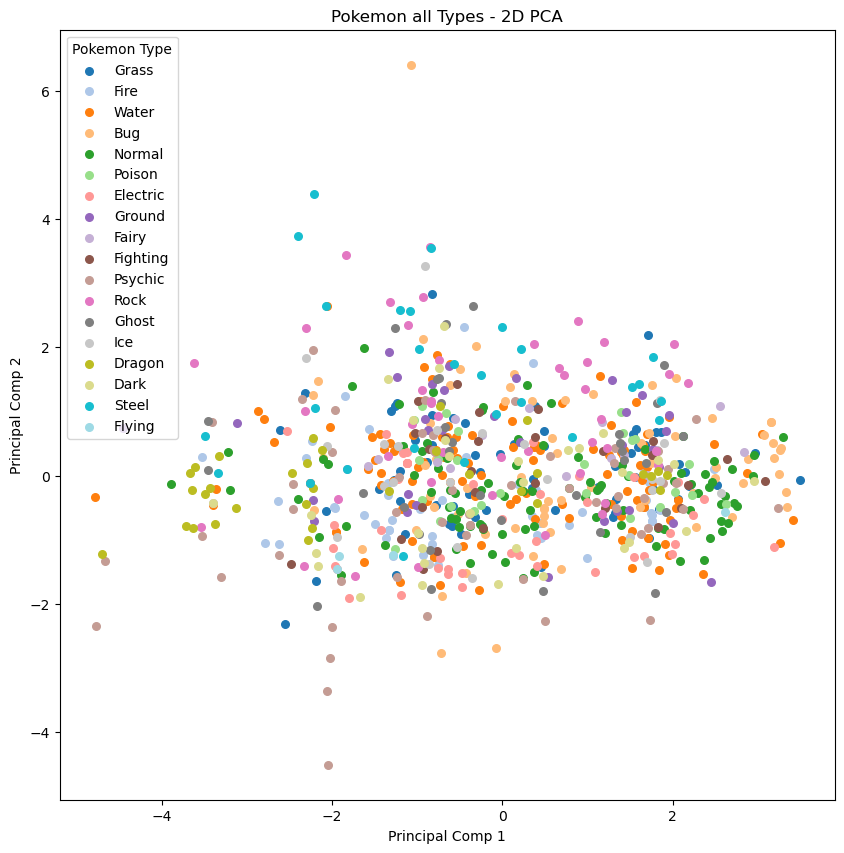

In [9]:
# Wykres danych typów Pokemonów

import matplotlib.pyplot as plt

unique_types = original_data['Type 1'].unique()
unique_types

cmap = plt.get_cmap('tab20', len(unique_types)) # tworzenie kolormapy do wykresu
type_colors = {unique_type: cmap(i) for i, unique_type in enumerate(unique_types)} # słownik z przypisaniem typów do kolorów

plt.figure(figsize=(10, 10))

# Przypisanie kolorów punktów według typu
for unique_type in unique_types:
    mask = original_data['Type 1'] == unique_type
    X = transformed_data[mask, 0]
    Y = transformed_data[mask, 1]
    plt.scatter(X,
                Y,
                label=unique_type,
                color=type_colors[unique_type],
                s=30)

plt.legend(title='Pokemon Type')
plt.xlabel('Principal Comp 1')
plt.ylabel('Principal Comp 2')
plt.title('Pokemon all Types - 2D PCA')
plt.show()

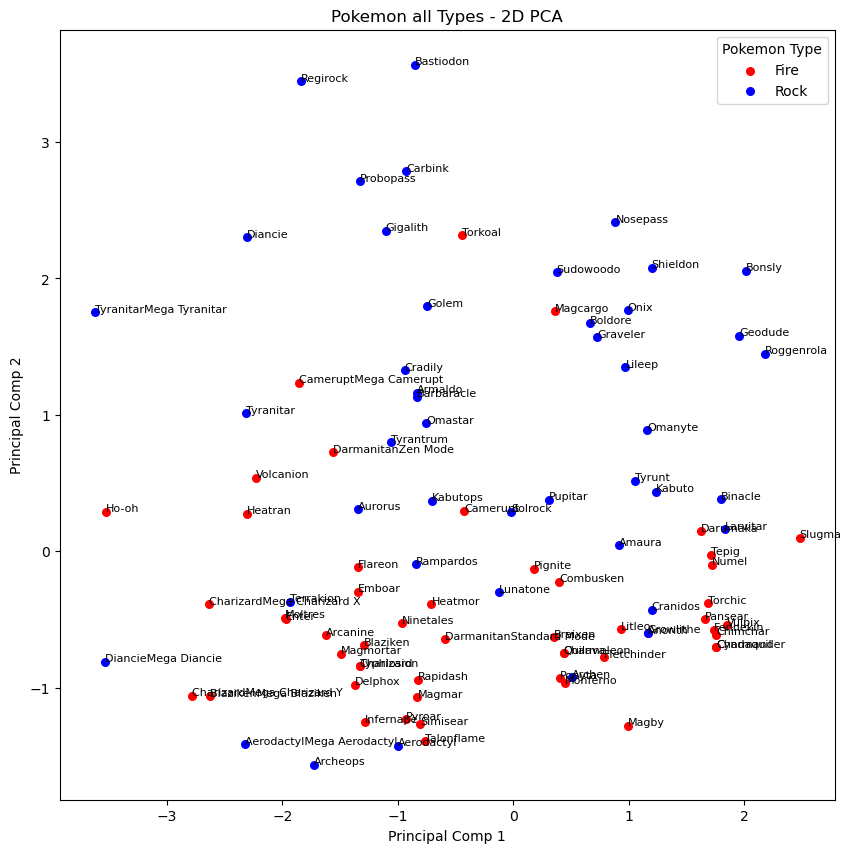

In [10]:
# Na wykresie niewiele widać, więc próbujemy wybrać tylko dwa dowolne typy

selected_types = ["Fire", "Rock"]
type_colors = {selected_types[0]: "red",
               selected_types[1]: "blue"}
plt.figure(figsize=(10, 10))

# Przypisanie kolorów punktów według typu
for unique_type in selected_types:
    mask = original_data['Type 1'] == unique_type
    X = transformed_data[mask, 0]
    Y = transformed_data[mask, 1]
    plt.scatter(X,
                Y,
                label=unique_type,
                color=type_colors[unique_type],
                s=30)
# Nazwy Pokemonów
    for i, row in original_data[mask].iterrows():
        plt.text(transformed_data[i, 0], transformed_data[i, 1], row['Name'], fontsize=8)

plt.legend(title='Pokemon Type')
plt.xlabel('Principal Comp 1')
plt.ylabel('Principal Comp 2')
plt.title('Pokemon all Types - 2D PCA')
plt.show()

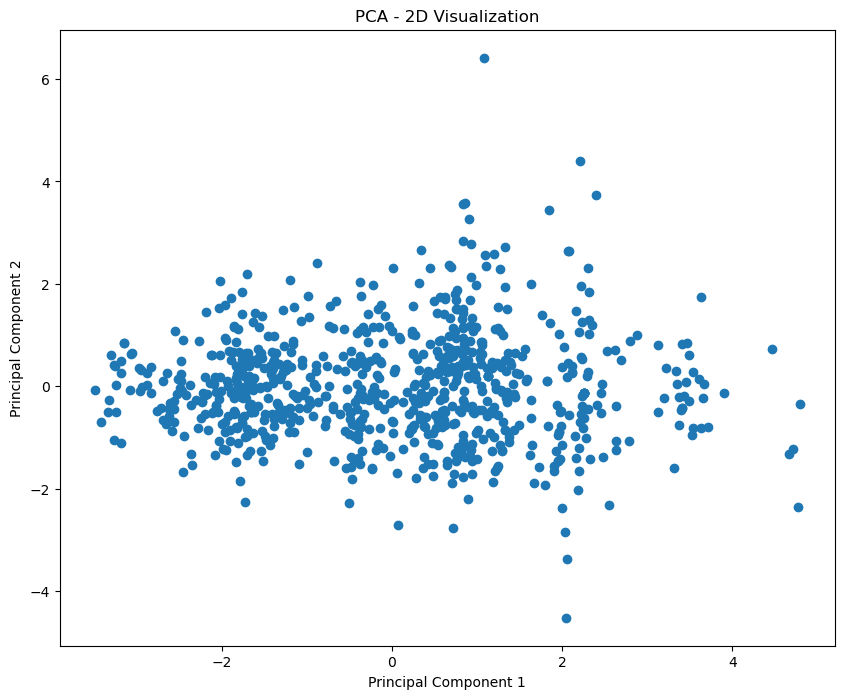

In [11]:
# PCA z wbudowanej funkcji Scikit-learn

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

original_data = pd.read_csv("pokemon.csv")
selected_features = original_data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]

# Standaryzacja
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_features)

# model PCA
pca = PCA(n_components=2)  # liczba komponentów głównych

# analiza PCA danych
transformed_data = pca.fit_transform(standardized_data)

# Wykres
plt.figure(figsize=(10, 8))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Visualization")
plt.show()

# Co ciekawego widać na tym wykresie?
